In [1]:
#for creating data visualizations
import matplotlib.pyplot as plt

#for creating numerical values
import numpy as np

# for creating attractive and informative statistical graphics.
import seaborn as sns

#for technical computing in Python like integration,statistics
import scipy

#it provides functionality for working with regular expressions 
import re

# stats is the submodule of scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

#preprocessing modules are used to prepare data for machine learning tasks.
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# is a popular machine learning library for gradient boosting 
#from xgboost import XGBClassifier

# analyze data in various formats like CSV, Excel, SQL databases, and more
import pandas as pd

data=pd.read_csv(r"C:\Users\ameya\Downloads\seattle-weather.csv")
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
data.shape

(1461, 6)

In [3]:

countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:0.2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))
     


percent of rain:43.87%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [4]:
#It creates a new DataFrame
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

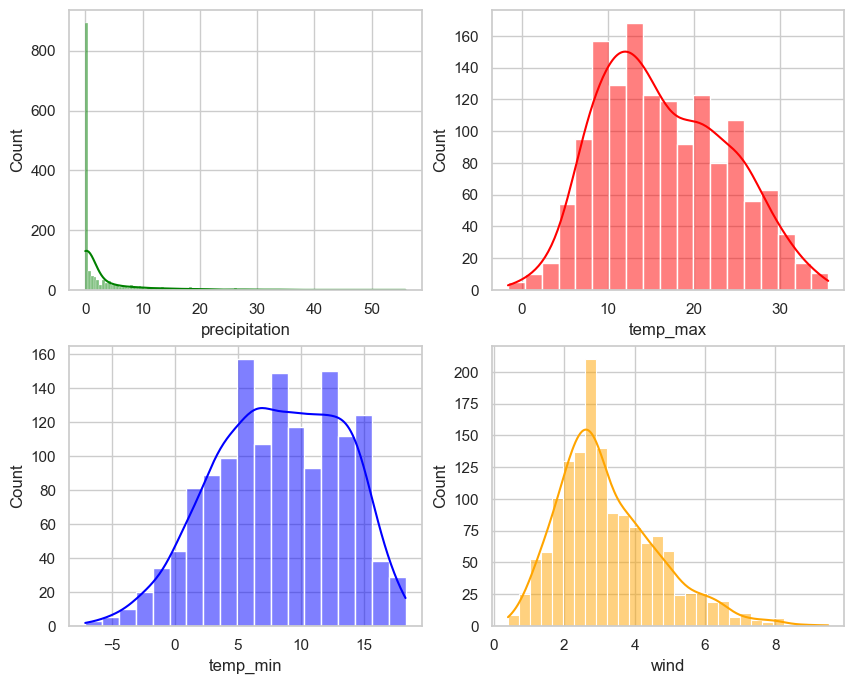

In [5]:
sns.set(style='whitegrid')  #seaborn
fig,axs=plt.subplots(2,2,figsize=(10,8)) #matplotlib

#kernel density estimate(kde plot),data visualization
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

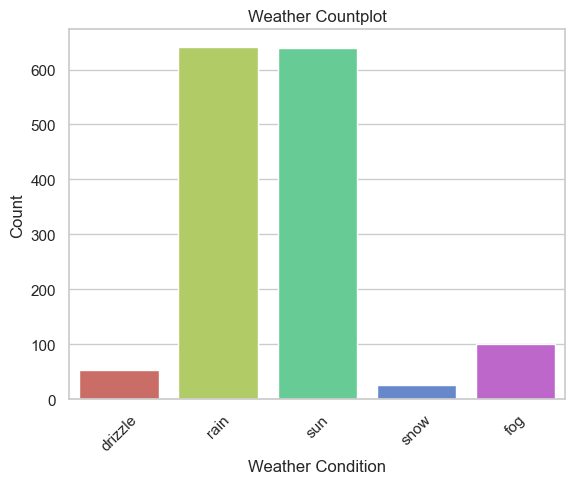

In [6]:
sns.countplot(x="weather", data=data, palette='hls')

# Display the plot
plt.title('Weather Countplot')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='wind'>

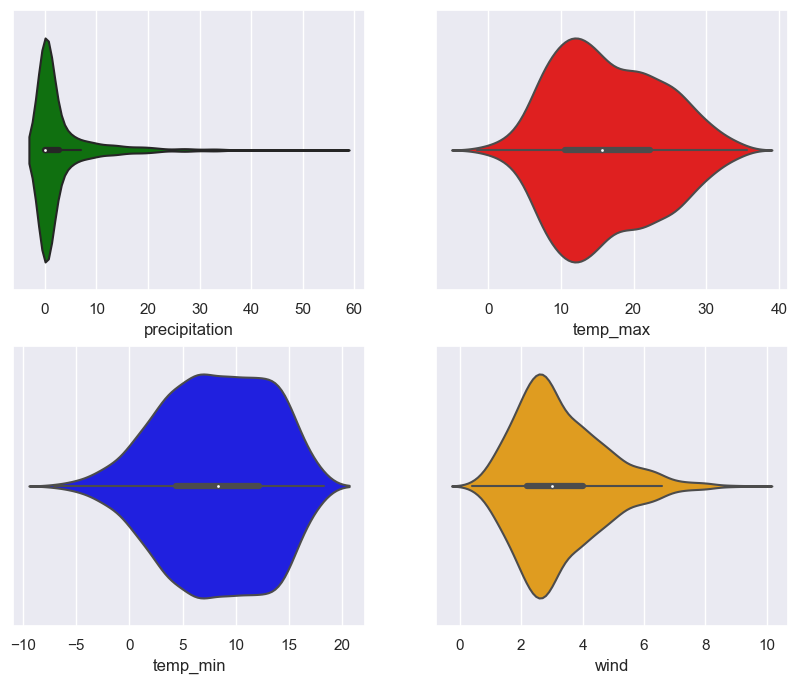

In [7]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.violinplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

pearsons correlation:  -0.2285548164329704
T test and P value:  Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


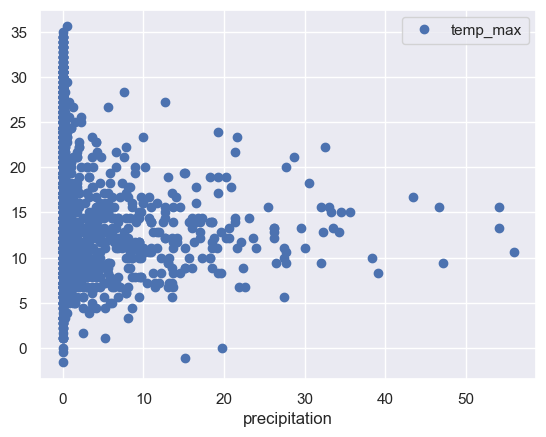

In [8]:
data.plot("precipitation",'temp_max',style='o')

#(corr) it find the correlation between precipitation and temp max
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.1648566348749546
T test and P value:  Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


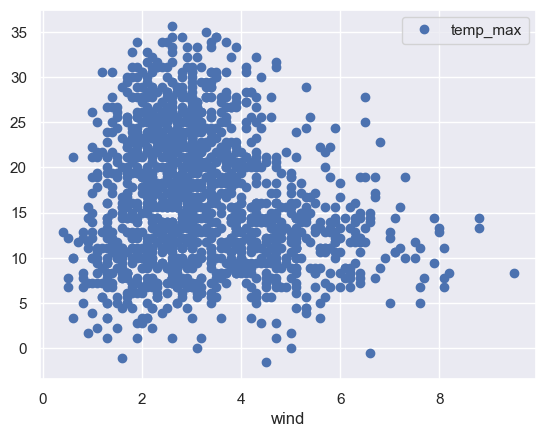

In [9]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))


In [10]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
x = data.drop(columns=["date","weather"]).astype(int).values
y=data["weather"].values

In [12]:
encoder = LabelEncoder()# sklearn to encode the weather column
data["weather"]=encoder.fit_transform(data["weather"])# transforms into numerical labels
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [13]:
encoder = LabelEncoder()
y=encoder.fit_transform(y)

In [14]:
np.unique(y, return_counts=True)#function to count the unique values in
                                 #the encoded 'y' array and return their counts

(array([0, 1, 2, 3, 4]), array([ 53, 101, 641,  26, 640], dtype=int64))

In [15]:
#(scale) ensure diff features on same scale
scale=StandardScaler() #This object will be used to scale your data.

x=scale.fit_transform(x)# ensures that each feature has 
                        #a mean of 0 and a standard deviation of 1.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
# 10% of the data will be used for testing, and the remaining 90% will be used for training.
x_train.shape,x_test.shape

((1314, 4), (147, 4))

In [17]:
svm=SVC()

#train the data
svm.fit(x_train,y_train)

print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))


SVM accuracy:79.59%


In [18]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))


KNN accuracy:75.51%


In [19]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=svm.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
rain


In [20]:
#use to store and later open source ,serializing and deserializing 
import pickle
file = 'model.pkl'
pickle.dump(knn,open(file, 'wb'))
     

In [21]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pickle

# Load the trained model
model = pickle.load(open('model.pkl', 'rb'))

def predict_weather():
    try:
        # Get input values from the user
        temp_max = float(temp_max_entry.get())
        temp_min = float(temp_min_entry.get())
        precipitation = float(precipitation_entry.get())
        wind = float(wind_entry.get())

        # Prepare input features as a NumPy array
        input_features = np.array([[precipitation, temp_max, temp_min, wind]])

        # Predict the weather condition
        predicted_category = model.predict(input_features)

        # Display the predicted weather condition
        weather_conditions = ['Drizzle', 'Fog', 'Rain', 'Snow', 'Sun']
        prediction_label.config(text='Predicted Weather: ' + weather_conditions[predicted_category[0]])
      
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numerical values for all fields.")

# Create the main window
window = tk.Tk()
window.title("Weather Prediction App")
window.configure(bg="lightblue")  # Set background color

# Create and place labels and entry widgets for input
tk.Label(window, text="Enter Weather Data", font=("Helvetica", 30), bg="white").pack()

tk.Label(window, text="Precipitation (mm):", font=("Helvetica", 20), bg="lightblue").pack()
precipitation_entry = tk.Entry(window)
precipitation_entry.pack()

tk.Label(window, text="Temperature Max (°C):", font=("Helvetica", 20), bg="lightblue").pack()
temp_max_entry = tk.Entry(window)
temp_max_entry.pack()

tk.Label(window, text="Temperature Min (°C):", font=("Helvetica", 20), bg="lightblue").pack()
temp_min_entry = tk.Entry(window)
temp_min_entry.pack()

tk.Label(window, text="Wind Speed (m/s):", font=("Helvetica", 20), bg="lightblue").pack()
wind_entry = tk.Entry(window)
wind_entry.pack()

# Create a button to predict weather
predict_button = tk.Button(window, text="Predict Weather", font=("Helvetica", 14), command=predict_weather)
predict_button.pack()

# Create a label to display the prediction result
prediction_label = tk.Label(window, text="", font=("Helvetica", 25), bg="lightblue")
prediction_label.pack()

# Create a label to display weather images
image_label = tk.Label(window, bg="lightblue")
image_label.pack()

# Set the window size
window.geometry("500x600")

# Run the Tkinter main loop
window.mainloop()
